In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import GEOparse

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.4.1
Pandas version: 2.3.3


In [2]:
# Choose your dataset
# GSE68849 - Lung cancer vs. normal tissue
# GSE50760 - Colorectal cancer progression
# GSE114762 - Drug response

geo_accession = 'GSE68849' 

print(f"Downloading {geo_accession} from GEO database...")
print("This may take 2-5 minutes depending on dataset size...")

# Download the dataset
gse = GEOparse.get_GEO(geo=geo_accession, destdir='../data/raw/')

print(f"✓ Download complete!")
print(f"Dataset: {gse.name}")
print(f"Number of samples: {len(gse.gsms)}")

18-Jan-2026 13:13:19 DEBUG utils - Directory ../data/raw/ already exists. Skipping.
18-Jan-2026 13:13:19 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE68nnn/GSE68849/soft/GSE68849_family.soft.gz to ../data/raw/GSE68849_family.soft.gz


This may take 2-5 minutes depending on dataset size...


100%|██████████| 21.7M/21.7M [00:00<00:00, 29.5MB/s]
18-Jan-2026 13:13:20 DEBUG downloader - Size validation passed
18-Jan-2026 13:13:20 DEBUG downloader - Moving /var/folders/lp/7xzmk01d31zd2kb15mbmvbnm0000gn/T/tmp8b61u795 to /Users/tasdid/Documents/Projects/gene-expression-analysis/data/raw/GSE68849_family.soft.gz
18-Jan-2026 13:13:20 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE68nnn/GSE68849/soft/GSE68849_family.soft.gz
18-Jan-2026 13:13:20 INFO GEOparse - Parsing ../data/raw/GSE68849_family.soft.gz: 
18-Jan-2026 13:13:20 DEBUG GEOparse - DATABASE: GeoMiame
18-Jan-2026 13:13:20 DEBUG GEOparse - SERIES: GSE68849
18-Jan-2026 13:13:20 DEBUG GEOparse - PLATFORM: GPL10558
18-Jan-2026 13:13:21 DEBUG GEOparse - SAMPLE: GSM1684095
18-Jan-2026 13:13:21 DEBUG GEOparse - SAMPLE: GSM1684096
18-Jan-2026 13:13:21 DEBUG GEOparse - SAMPLE: GSM1684097
18-Jan-2026 13:13:21 DEBUG GEOparse - SAMPLE: GSM1684098
18-Jan-2026 13:13:21 DEBUG GEOparse - SAMPLE: GSM1684

✓ Download complete!
Dataset: GSE68849
Number of samples: 10


In [3]:
# Extract the expression data into a pandas DataFrame
expression_data = gse.pivot_samples('VALUE')

print(f"Expression matrix shape: {expression_data.shape}")
print(f"Genes: {expression_data.shape[0]:,}")
print(f"Samples: {expression_data.shape[1]:,}")
print(f"\nFirst few rows and columns:")
expression_data.head()

Expression matrix shape: (47321, 10)
Genes: 47,321
Samples: 10

First few rows and columns:


name,GSM1684095,GSM1684096,GSM1684097,GSM1684098,GSM1684099,GSM1684100,GSM1684101,GSM1684102,GSM1684103,GSM1684104
ID_REF,,,,,,,,,,
ILMN_1343291,23599.32000,22303.32000,25980.17000,24776.12000,24776.12000,26775.3400,25980.17000,25980.17000,23599.32000,26775.34000
ILMN_1343295,6405.33500,7732.65200,6553.47900,5296.74600,7699.21900,6430.1560,6648.16200,4801.03400,8646.44300,5654.93500
ILMN_1651199,95.19509,106.23970,97.54575,94.69421,106.28950,108.2523,95.39828,102.89100,83.56386,88.30685
ILMN_1651209,95.65199,97.22574,105.75440,100.54720,119.32600,109.0526,111.95810,94.74513,115.32370,107.90740
ILMN_1651210,101.82980,97.09778,125.64750,102.29230,99.58566,119.7902,103.83580,105.95980,102.44580,94.93552


In [4]:
# Extract sample information
sample_info = []

for gsm_name, gsm in gse.gsms.items():
    sample_info.append({
        'sample_id': gsm_name,
        'title': gsm.metadata.get('title', [''])[0],
        'source': gsm.metadata.get('source_name_ch1', [''])[0],
        'characteristics': gsm.metadata.get('characteristics_ch1', [])
    })

metadata = pd.DataFrame(sample_info)
print(f"Sample metadata shape: {metadata.shape}")
print(f"\nSample information:")
metadata.head(10)

Sample metadata shape: (10, 4)

Sample information:


,sample_id,title,source,characteristics
0,GSM1684095,Donor 1 - No virus control - 8h,Blood pDCs,"[donor: Donor 1, agent: No virus control, cell..."
1,GSM1684096,Donor 1 - Influenza treated - 8h,Blood pDCs,"[donor: Donor 1, agent: Influenza A, cell type..."
2,GSM1684097,Donor 2 - No virus control - 8h,Blood pDCs,"[donor: Donor 2, agent: No virus control, cell..."
3,GSM1684098,Donor 2 - Influenza treated - 8h,Blood pDCs,"[donor: Donor 2, agent: Influenza A, cell type..."
4,GSM1684099,Donor 3 - No virus control - 8h,Blood pDCs,"[donor: Donor 3, agent: No virus control, cell..."
5,GSM1684100,Donor 3 - Influenza treated - 8h,Blood pDCs,"[donor: Donor 3, agent: Influenza A, cell type..."
6,GSM1684101,Donor 4 - No virus control - 8h,Blood pDCs,"[donor: Donor 4, agent: No virus control, cell..."
7,GSM1684102,Donor 4 - Influenza treated - 8h,Blood pDCs,"[donor: Donor 4, agent: Influenza A, cell type..."
8,GSM1684103,Donor 5 - No virus control - 8h,Blood pDCs,"[donor: Donor 5, agent: No virus control, cell..."
9,GSM1684104,Donor 5 - Influenza treated - 8h,Blood pDCs,"[donor: Donor 5, agent: Influenza A, cell type..."


In [5]:
# Extract treatment information from titles
metadata['treatment'] = metadata['title'].apply(
    lambda x: 'Control' if 'No virus' in x else 'Influenza'
)

# Count samples in each group
print("Sample groups:")
print(metadata['treatment'].value_counts())
print("\nBreakdown:")
print(metadata[['sample_id', 'treatment']])

Sample groups:
treatment
Control      5
Influenza    5
Name: count, dtype: int64

Breakdown:
    sample_id  treatment
0  GSM1684095    Control
1  GSM1684096  Influenza
2  GSM1684097    Control
3  GSM1684098  Influenza
4  GSM1684099    Control
5  GSM1684100  Influenza
6  GSM1684101    Control
7  GSM1684102  Influenza
8  GSM1684103    Control
9  GSM1684104  Influenza


In [6]:
# Check data quality
print("Data Quality Check:")
print("-" * 40)
print(f"Total data points: {expression_data.size:,}")
print(f"Missing values: {expression_data.isnull().sum().sum():,}")
print(f"Percentage missing: {expression_data.isnull().sum().sum() / expression_data.size * 100:.4f}%")
print(f"\nExpression value range:")
print(f"  Min: {expression_data.min().min():.2f}")
print(f"  Max: {expression_data.max().max():.2f}")
print(f"  Mean: {expression_data.mean().mean():.2f}")

Data Quality Check:
----------------------------------------
Total data points: 473,210
Missing values: 0
Percentage missing: 0.0000%

Expression value range:
  Min: 67.16
  Max: 26775.34
  Mean: 346.25


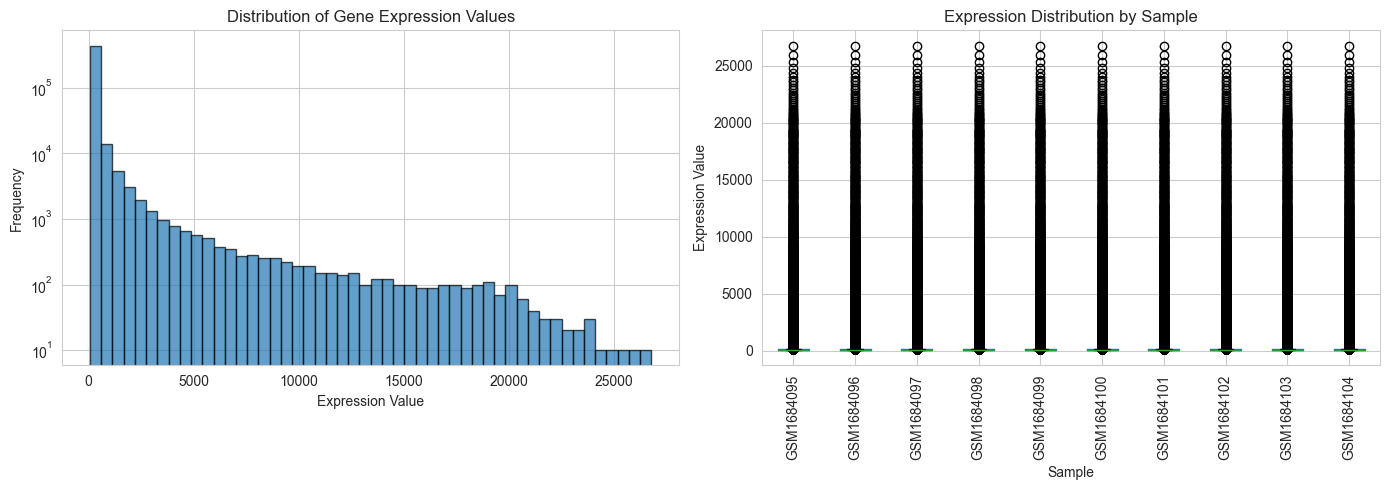

Visualization complete!


In [7]:
# Plot distribution of expression values
plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(expression_data.values.flatten(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Expression Value')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Expression Values')
plt.yscale('log')  # Log scale to see distribution better

# Box plot by sample
plt.subplot(1, 2, 2)
expression_data.boxplot(rot=90)
plt.xlabel('Sample')
plt.ylabel('Expression Value')
plt.title('Expression Distribution by Sample')
plt.tight_layout()
plt.show()

print("Visualization complete!")

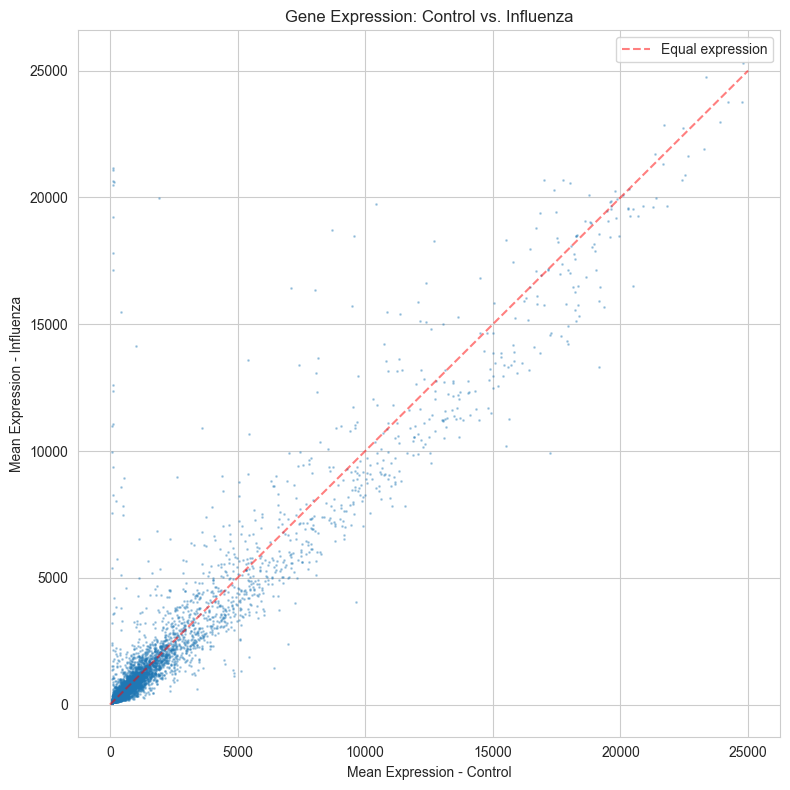


Genes with highest fold-change (Influenza/Control):
ID_REF
ILMN_2186745    185.506474
ILMN_1769988    164.974545
ILMN_1698186    159.119521
ILMN_1664595    152.150379
ILMN_1682245    151.291112
ILMN_1733136    142.259429
ILMN_2129202    137.299433
ILMN_1675192    127.626533
ILMN_2202096    126.238737
ILMN_1776023    116.916847
dtype: float64


In [8]:
# Calculate mean expression for each group
control_samples = metadata[metadata['treatment'] == 'Control']['sample_id'].tolist()
influenza_samples = metadata[metadata['treatment'] == 'Influenza']['sample_id'].tolist()

control_mean = expression_data[control_samples].mean(axis=1)
influenza_mean = expression_data[influenza_samples].mean(axis=1)

# Create scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(control_mean, influenza_mean, alpha=0.3, s=1)
plt.xlabel('Mean Expression - Control')
plt.ylabel('Mean Expression - Influenza')
plt.title('Gene Expression: Control vs. Influenza')
plt.plot([0, 25000], [0, 25000], 'r--', alpha=0.5, label='Equal expression')
plt.legend()
plt.tight_layout()
plt.show()

# Find some genes with big differences
fold_change = influenza_mean / (control_mean + 1)  # Add 1 to avoid division by zero
print(f"\nGenes with highest fold-change (Influenza/Control):")
print(fold_change.nlargest(10))

In [9]:
from scipy import stats

# Perform t-test for each gene
pvalues = []
log2_fold_changes = []

for gene in expression_data.index:
    control_values = expression_data.loc[gene, control_samples]
    influenza_values = expression_data.loc[gene, influenza_samples]
    
    # T-test
    t_stat, pval = stats.ttest_ind(control_values, influenza_values)
    pvalues.append(pval)
    
    # Log2 fold change
    fc = (influenza_values.mean() + 1) / (control_values.mean() + 1)
    log2_fc = np.log2(fc)
    log2_fold_changes.append(log2_fc)

# Create results dataframe
results = pd.DataFrame({
    'gene': expression_data.index,
    'log2_fold_change': log2_fold_changes,
    'pvalue': pvalues,
    'control_mean': control_mean.values,
    'influenza_mean': influenza_mean.values
})

print(f"Differential expression analysis complete!")
print(f"Genes analyzed: {len(results):,}")
results.head(10)

Differential expression analysis complete!
Genes analyzed: 47,321


,gene,log2_fold_change,pvalue,control_mean,influenza_mean
0,ILMN_1343291,0.030809,0.604824,24787.020000,25322.058000
1,ILMN_1343295,-0.265163,0.108424,7190.527600,5983.104600
2,ILMN_1651199,0.065379,0.415244,95.598496,100.076812
3,ILMN_1651209,-0.104207,0.163392,109.602838,101.895614
4,ILMN_1651210,-0.036005,0.693871,106.668912,104.015120
5,ILMN_1651221,-0.061239,0.227941,105.846124,101.405642
6,ILMN_1651228,-0.209343,0.087201,10591.742600,9160.989200
7,ILMN_1651229,-0.070798,0.666517,212.823520,202.583720
8,ILMN_1651230,0.088602,0.121516,95.082018,101.167758
9,ILMN_1651232,-0.047729,0.406832,107.456142,103.926776


In [10]:
from statsmodels.stats.multitest import multipletests

# Apply FDR correction (Benjamini-Hochberg)
results['fdr'] = multipletests(results['pvalue'], method='fdr_bh')[1]

# Identify significant genes (FDR < 0.05, |log2FC| > 1)
results['significant'] = (results['fdr'] < 0.05) & (abs(results['log2_fold_change']) > 1)

# Count significant genes
n_significant = results['significant'].sum()
n_upregulated = ((results['log2_fold_change'] > 1) & (results['fdr'] < 0.05)).sum()
n_downregulated = ((results['log2_fold_change'] < -1) & (results['fdr'] < 0.05)).sum()

print(f"Significant genes (FDR < 0.05, |log2FC| > 1): {n_significant:,}")
print(f"  Upregulated in Influenza: {n_upregulated:,}")
print(f"  Downregulated in Influenza: {n_downregulated:,}")

# Show top upregulated genes
print("\nTop 10 upregulated genes:")
top_up = results[results['log2_fold_change'] > 0].nlargest(10, 'log2_fold_change')
print(top_up[['gene', 'log2_fold_change', 'fdr', 'influenza_mean', 'control_mean']])

Significant genes (FDR < 0.05, |log2FC| > 1): 72
  Upregulated in Influenza: 53
  Downregulated in Influenza: 19

Top 10 upregulated genes:
               gene  log2_fold_change       fdr  influenza_mean  control_mean
34785  ILMN_2186745          7.535396  0.000270      20478.8080    109.394034
21560  ILMN_1769988          7.366168  0.000646      21084.6740    126.805620
9746   ILMN_1698186          7.314035  0.000270      21162.0180    131.994480
3041   ILMN_1664595          7.249438  0.000200      17123.2900    111.541882
6690   ILMN_1682245          7.241253  0.000200      20653.5760    135.515462
15705  ILMN_1733136          7.152450  0.000200      20612.7340    143.895380
33761  ILMN_2129202          7.101257  0.000885      19248.2640    139.191868
5263   ILMN_1675192          6.995866  0.010387      17791.5880    138.403520
35079  ILMN_2202096          6.980142  0.015518      10977.6774     85.959658
22531  ILMN_1776023          6.869455  0.095882      12385.8114    104.936926


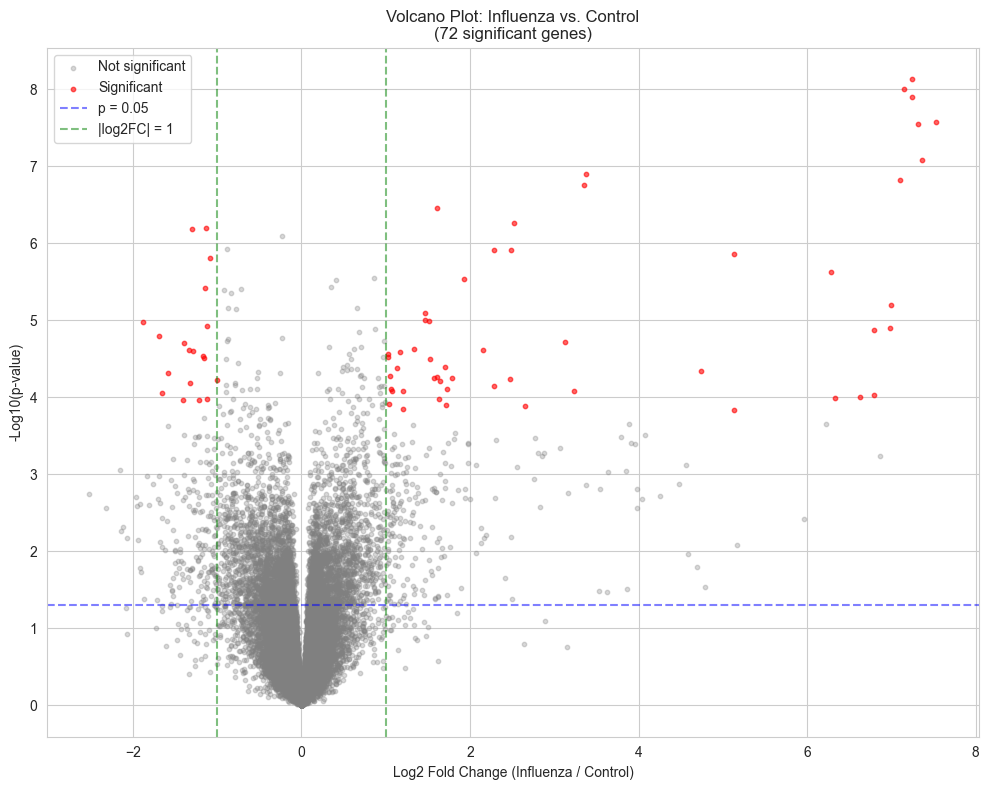

Volcano plot complete!


In [11]:
# Create volcano plot
plt.figure(figsize=(10, 8))

# Plot non-significant genes
not_sig = results[~results['significant']]
plt.scatter(not_sig['log2_fold_change'], -np.log10(not_sig['pvalue']), 
            alpha=0.3, s=10, c='gray', label='Not significant')

# Plot significant genes
sig = results[results['significant']]
plt.scatter(sig['log2_fold_change'], -np.log10(sig['pvalue']), 
            alpha=0.6, s=10, c='red', label='Significant')

# Add threshold lines
plt.axhline(-np.log10(0.05), color='blue', linestyle='--', alpha=0.5, label='p = 0.05')
plt.axvline(-1, color='green', linestyle='--', alpha=0.5)
plt.axvline(1, color='green', linestyle='--', alpha=0.5, label='|log2FC| = 1')

plt.xlabel('Log2 Fold Change (Influenza / Control)')
plt.ylabel('-Log10(p-value)')
plt.title(f'Volcano Plot: Influenza vs. Control\n({n_significant:,} significant genes)')
plt.legend()
plt.tight_layout()
plt.show()

print("Volcano plot complete!")

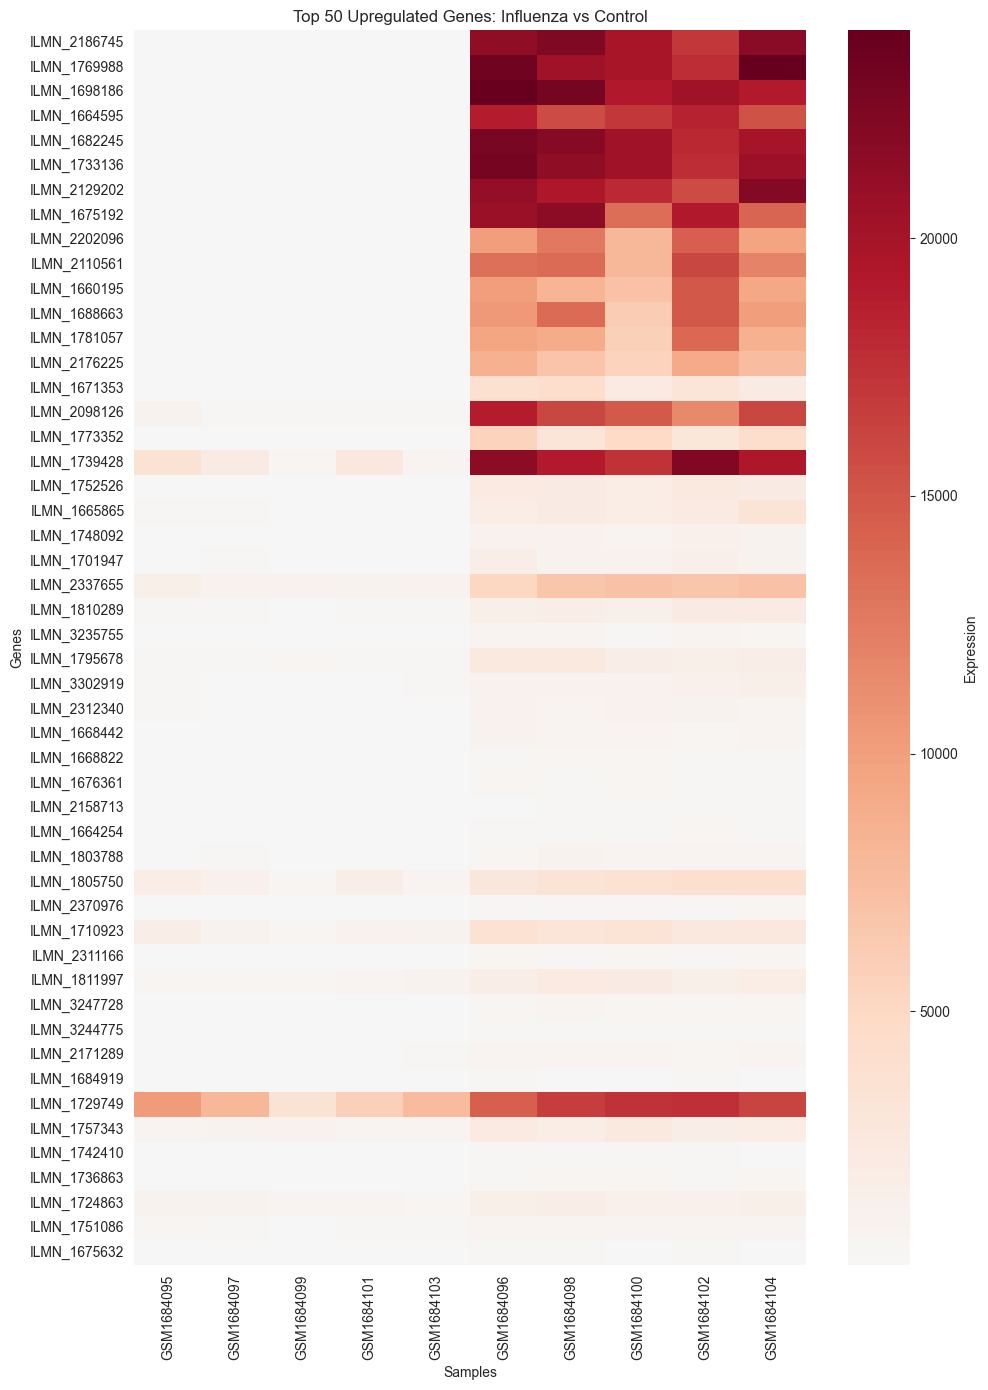

Heatmap complete!


In [12]:
import seaborn as sns

# Get top 50 significant genes by absolute log2 fold change
top_genes = results[results['significant']].nlargest(50, 'log2_fold_change')
top_gene_ids = top_genes['gene'].tolist()

# Extract expression data for these genes
heatmap_data = expression_data.loc[top_gene_ids]

# Reorder columns by treatment group
column_order = metadata.sort_values('treatment')['sample_id'].tolist()
heatmap_data = heatmap_data[column_order]

# Create heatmap
plt.figure(figsize=(10, 14))
sns.heatmap(heatmap_data, cmap='RdBu_r', center=0, 
            cbar_kws={'label': 'Expression'}, 
            yticklabels=True, xticklabels=True)
plt.title('Top 50 Upregulated Genes: Influenza vs Control')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.tight_layout()
plt.show()

print("Heatmap complete!")

In [13]:
# Save the full results table
results.to_csv('../results/tables/differential_expression_results.csv', index=False)

# Save just the significant genes
sig_genes = results[results['significant']].sort_values('log2_fold_change', ascending=False)
sig_genes.to_csv('../results/tables/significant_genes.csv', index=False)

# Save the expression matrix for significant genes
sig_expression = expression_data.loc[sig_genes['gene']]
sig_expression.to_csv('../data/processed/significant_genes_expression.csv')

print(f"✓ Saved full results: {len(results):,} genes")
print(f"✓ Saved significant genes: {len(sig_genes):,} genes")
print(f"✓ Files saved to results/tables/")

✓ Saved full results: 47,321 genes
✓ Saved significant genes: 72 genes
✓ Files saved to results/tables/
